In [29]:
import pandas as pd

# we restrict this (very large) dataset to the variables of interest
columns = ['id', 'year', 'age', 'sex', 'race', 'degree', 'realrinc', 'region', 'readfict', 'news', 'litread', 'happy']
df = pd.read_stata("GSS7218_R1.dta", columns=columns)

# further limit dataset to the years we are interested in
df = df.loc[df['year'].isin({1998, 2000, 2002})]
print(df.head)

<bound method NDFrame.head of          id  year age     sex   race          degree   realrinc  \
35284     1  1998  60    male  white     HIGH SCHOOL  31005.000   
35285     2  1998  27  female  white  JUNIOR COLLEGE  11196.000   
35286     3  1998  36    male  white     HIGH SCHOOL  56842.000   
35287     4  1998  21    male  white     HIGH SCHOOL  11196.000   
35288     5  1998  35  female  white        bachelor  31005.000   
...     ...   ...  ..     ...    ...             ...        ...   
43693  2761  2002  22    male  white  LT HIGH SCHOOL  14860.375   
43694  2762  2002  46    male  white        bachelor        NaN   
43695  2763  2002  85  female  white     HIGH SCHOOL        NaN   
43696  2764  2002  75    male  black     HIGH SCHOOL        NaN   
43697  2765  2002  46    male  white     HIGH SCHOOL  42234.750   

                region readfict               news litread         happy  
35284  W. SOU. CENTRAL      yes                NaN     NaN  PRETTY HAPPY  
35285  W. SOU. 

In [30]:
# limit dataset to exclude records from individuals who refused
# to report their income
df = df.loc[df['realrinc'].notnull()]
print(df.head)

<bound method NDFrame.head of          id  year age     sex   race          degree   realrinc  \
35284     1  1998  60    male  white     HIGH SCHOOL  31005.000   
35285     2  1998  27  female  white  JUNIOR COLLEGE  11196.000   
35286     3  1998  36    male  white     HIGH SCHOOL  56842.000   
35287     4  1998  21    male  white     HIGH SCHOOL  11196.000   
35288     5  1998  35  female  white        bachelor  31005.000   
...     ...   ...  ..     ...    ...             ...        ...   
43690  2758  2002  45    male  white     HIGH SCHOOL   4067.050   
43691  2759  2002  22  female  white     HIGH SCHOOL   8603.375   
43692  2760  2002  43  female  white     HIGH SCHOOL  13296.125   
43693  2761  2002  22    male  white  LT HIGH SCHOOL  14860.375   
43697  2765  2002  46    male  white     HIGH SCHOOL  42234.750   

                region readfict               news litread         happy  
35284  W. SOU. CENTRAL      yes                NaN     NaN  PRETTY HAPPY  
35285  W. SOU. 

In [31]:
# REALITY CHECK, using GSS provided values
df.loc[df['year'] == 2000, 'realrinc'].astype(float).min() == 333;
round(df.loc[df['year'] == 2000, 'realrinc'].astype(float).mean(), 2) == 22110.13;
print(df.head)

# inflation measured via US Consumer Price Index (CPI), source:
# http://www.dlt.ri.gov/lmi/pdf/cpi.pdf
cpi2015_vs_1986 = 236.7 / 109.6
assert df['realrinc'].astype(float).median() < 24000  # reality check
df['realrinc2015'] = cpi2015_vs_1986 * df['realrinc'].astype(float)
print(df.head)

<bound method NDFrame.head of          id  year age     sex   race          degree   realrinc  \
35284     1  1998  60    male  white     HIGH SCHOOL  31005.000   
35285     2  1998  27  female  white  JUNIOR COLLEGE  11196.000   
35286     3  1998  36    male  white     HIGH SCHOOL  56842.000   
35287     4  1998  21    male  white     HIGH SCHOOL  11196.000   
35288     5  1998  35  female  white        bachelor  31005.000   
...     ...   ...  ..     ...    ...             ...        ...   
43690  2758  2002  45    male  white     HIGH SCHOOL   4067.050   
43691  2759  2002  22  female  white     HIGH SCHOOL   8603.375   
43692  2760  2002  43  female  white     HIGH SCHOOL  13296.125   
43693  2761  2002  22    male  white  LT HIGH SCHOOL  14860.375   
43697  2765  2002  46    male  white     HIGH SCHOOL  42234.750   

                region readfict               news litread         happy  
35284  W. SOU. CENTRAL      yes                NaN     NaN  PRETTY HAPPY  
35285  W. SOU. 

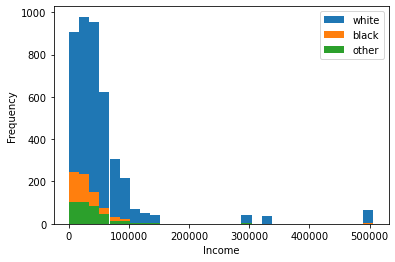

In [32]:
import matplotlib.pyplot as plt
df.groupby('race')['realrinc2015'].plot(kind='hist', bins=30)
plt.xlabel('Income')
plt.legend();

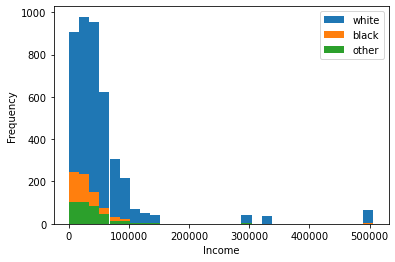

In [34]:
import matplotlib.pyplot as plt
df.groupby('race')['realrinc2015'].plot(kind='hist', bins=30)
plt.xlabel('Income')
plt.legend();

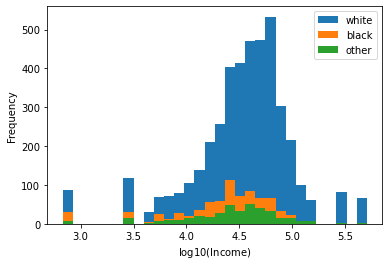

In [35]:
import numpy as np

df['realrinc2015_log10'] = np.log10(df['realrinc2015'])
df.groupby('race')['realrinc2015_log10'].plot(kind='hist', bins=30)
plt.xlabel(r'$\log10(\mathrm{Income})$')
plt.legend();

In [36]:
print(df['realrinc2015'].max() / df['realrinc2015'].min())
print(df['realrinc2015'].mean())
print(df['realrinc2015'].median())

749.1342599999999
51296.74902490707
37160.92814781022


In [37]:
df_bachelor = df[df['degree'] == 'bachelor']
# observed=True instructs pandas to ignore categories
# without any observations
df_bachelor.groupby(['year', 'degree'], observed=True)['realrinc2015'].agg(['size', 'mean', 'median'])

,,size,mean,median
year,degree,,,
1998,bachelor,363,63805.508302,48359.364964
2000,bachelor,344,58819.407571,46674.821168
2002,bachelor,307,85469.227956,50673.992929


In [38]:
readfict_sample = df.loc[df['readfict'].notnull()].sample(8)['readfict']
readfict_sample = readfict_sample.replace(['no', 'yes'], [0, 1])
print(readfict_sample)

print("Mean:", readfict_sample.mean())
print("Median:", readfict_sample.median())

41687    0
36793    1
43055    0
42535    1
36708    1
41873    1
42415    1
42400    0
Name: readfict, dtype: int64
Mean: 0.625
Median: 1.0


In [39]:
df.groupby('degree')['realrinc2015'].mad().round()

degree
LT HIGH SCHOOL    19551.0
HIGH SCHOOL       23568.0
JUNIOR COLLEGE    33776.0
bachelor          45055.0
graduate          77014.0
Name: realrinc2015, dtype: float64

In [40]:
df_bachelor_or_more = df[df['degree'].isin(['bachelor', 'graduate'])]
df_bachelor_or_more.groupby(['degree', 'readfict'], observed=True)['realrinc2015'].mad().round()

degree    readfict
bachelor  yes          48908.0
          no          119523.0
graduate  yes          82613.0
          no          133028.0
Name: realrinc2015, dtype: float64

In [41]:
df_bachelor_or_more.groupby(['degree', 'readfict'], observed=True)['realrinc2015'].mean().round()

degree    readfict
bachelor  yes          71251.0
          no          139918.0
graduate  yes         113125.0
          no          153961.0
Name: realrinc2015, dtype: float64

In [43]:
df_bachelor_or_more.groupby(['happy', 'readfict'], observed=True)['realrinc2015'].mean().round()

happy          readfict
VERY HAPPY     yes         107718.0
               no          159788.0
PRETTY HAPPY   yes          73977.0
               no          124923.0
NOT TOO HAPPY  yes          58916.0
               no          206463.0
Name: realrinc2015, dtype: float64

In [51]:
df_bachelor_or_more.groupby(['happy', 'news'], observed=True)['age'].mean().round()

DataError: No numeric types to aggregate

In [42]:
group1 = ['high school', 'high school', 'high school', 'high school', 'high school',
          'high school', 'bachelor', 'bachelor']
group2 = ['lt high school', 'lt high school', 'lt high school', 'lt high school',
          'high school', 'junior college', 'bachelor', 'graduate']
group3 = ['lt high school', 'lt high school', 'high school', 'high school',
          'junior college', 'junior college', 'bachelor', 'graduate']

# calculate the number of unique values in each group
print([len(set(group)) for group in [group1, group2, group3]])
# calculate the ratio of observed categories to total observations
print([len(set(group)) / len(group) for group in [group1, group2, group3]])

[2, 5, 5]
[0.25, 0.625, 0.625]
